In [1]:
import torch
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

# Hyper parameters
N_SAMPLES = 2000
BATCH_SIZE = 64
EPOCH = 12
LR = 0.03
N_HIDDEN = 8
ACTIVATION = torch.tanh
B_INIT = -0.2   # use a bad bias constant initializer

# training data
x = np.linspace(-7, 10, N_SAMPLES)[:, np.newaxis]
noise = np.random.normal(0, 2, x.shape)
y = np.square(x) - 5 + noise

# test data
test_x = np.linspace(-7, 10, 200)[:, np.newaxis]
noise = np.random.normal(0, 2, test_x.shape)
test_y = np.square(test_x) - 5 + noise

train_x, train_y = torch.from_numpy(x).float(), torch.from_numpy(y).float()
test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).float()

train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)




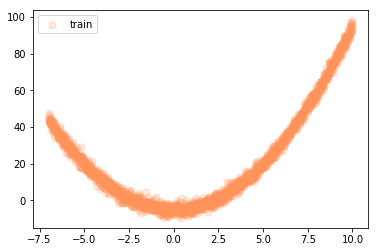

In [2]:
# show data
plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9359', s=50, alpha=0.2, label='train')
plt.legend(loc='upper left')


In [3]:
class Net(nn.Module):
    def __init__(self,has_bactch_normal=False):
        super(Net,self).__init__()
        
        self.has_bactch_normal = has_bactch_normal
        
        self.fcs = [] #收集要觀察的資料
        self.bns = []
        
        self.batch_noraml_input = nn.BatchNorm1d(num_features=1,momentum=0.5)
        
        for i in range(N_HIDDEN):
            input_size = 1 if i==0 else 10
            
            fc = nn.Linear(in_features=input_size,out_features=10)
            
            setattr(self,'fc%i'%i,fc) # 設定 layer 至 Module, fc1,fc2,fc3......
            
            self._set_init(fc)
            
            self.fcs.append(fc)
            
            if self.has_bactch_normal:
                bn = nn.BatchNorm1d(10,momentum=0.5)
                setattr(self, 'bn%i' % i, bn)   # IMPORTANT set layer to the Module
                self.bns.append(bn)
            
            
        self.predit = nn.Linear(10,1)
            
        self._set_init(self.predit)
        
    def _set_init(self,layer):
        
        init.normal_(layer.weight, mean=0., std=.1)
        init.constant_(layer.bias, B_INIT)
        
    def forward(self,x):
        pre_activation = [x]
        
        if self.has_bactch_normal:
            self.batch_noraml_input(x)
        
        layer_input = [x] 
        
        for i in range(N_HIDDEN):
            x = self.fcs[i](x)
            
            pre_activation.append(x)
            
            if self.has_bactch_normal:
                x = self.bns[i](x)
            
            x = ACTIVATION(x)
            
            layer_input.append(x)
            
        out = self.predit(x)
        
        return out , layer_input,pre_activation
                

In [4]:
nets = [Net(has_bactch_normal=False), Net(has_bactch_normal=True)]

print(nets)

[Net(
  (batch_noraml_input): BatchNorm1d(1, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc0): Linear(in_features=1, out_features=10, bias=True)
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=10, bias=True)
  (fc7): Linear(in_features=10, out_features=10, bias=True)
  (predit): Linear(in_features=10, out_features=1, bias=True)
), Net(
  (batch_noraml_input): BatchNorm1d(1, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc0): Linear(in_features=1, out_features=10, bias=True)
  (bn0): BatchNorm1d(10, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (bn1): BatchNorm1d(10, eps=1e

In [5]:
def plot_histogram(l_in, l_in_bn, pre_ac, pre_ac_bn):
    for i, (ax_pa, ax_pa_bn, ax, ax_bn) in enumerate(zip(axs[0, :], axs[1, :], axs[2, :], axs[3, :])):
        [a.clear() for a in [ax_pa, ax_pa_bn, ax, ax_bn]]
        if i == 0:
            p_range = (-7, 10);the_range = (-7, 10)
        else:
            p_range = (-4, 4);the_range = (-1, 1)
        ax_pa.set_title('L' + str(i))
        ax_pa.hist(pre_ac[i].data.numpy().ravel(), bins=10, range=p_range, color='#FF9359', alpha=0.5);ax_pa_bn.hist(pre_ac_bn[i].data.numpy().ravel(), bins=10, range=p_range, color='#74BCFF', alpha=0.5)
        ax.hist(l_in[i].data.numpy().ravel(), bins=10, range=the_range, color='#FF9359');ax_bn.hist(l_in_bn[i].data.numpy().ravel(), bins=10, range=the_range, color='#74BCFF')
        for a in [ax_pa, ax, ax_pa_bn, ax_bn]: a.set_yticks(());a.set_xticks(())
        ax_pa_bn.set_xticks(p_range);ax_bn.set_xticks(the_range)
        axs[0, 0].set_ylabel('PreAct');axs[1, 0].set_ylabel('BN PreAct');axs[2, 0].set_ylabel('Act');axs[3, 0].set_ylabel('BN Act')
    plt.pause(0.01)

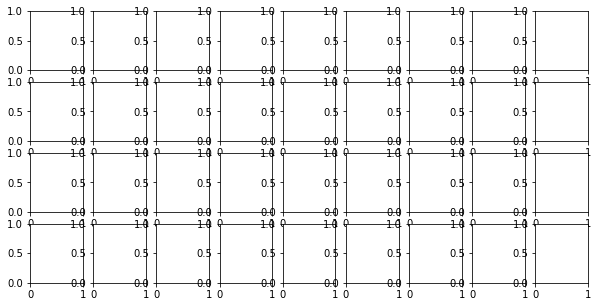

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


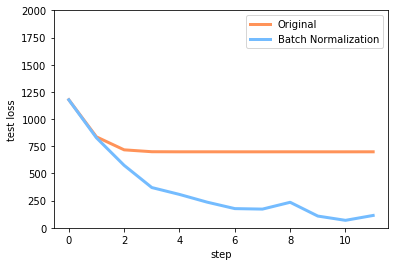

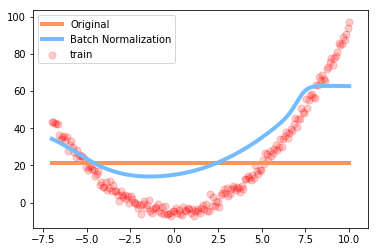

In [6]:



opts = [torch.optim.Adam(net.parameters(), lr=LR) for net in nets]

loss_func = torch.nn.MSELoss()
f, axs = plt.subplots(4, N_HIDDEN + 1, figsize=(10, 5))
plt.ion()  # something about plotting
plt.show()

# training
losses = [[], []]  # recode loss for two networks

for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    layer_inputs, pre_acts = [], []
    for net, l in zip(nets, losses):
        net.eval()              # set eval mode to fix moving_mean and moving_var
        pred, layer_input, pre_act = net(test_x)
        l.append(loss_func(pred, test_y).data.item())
        layer_inputs.append(layer_input)
        pre_acts.append(pre_act)
        net.train()             # free moving_mean and moving_var
    plot_histogram(*layer_inputs, *pre_acts)     # plot histogram

    for step, (b_x, b_y) in enumerate(train_loader):
        for net, opt in zip(nets, opts):     # train for each network
            pred, _, _ = net(b_x)
            loss = loss_func(pred, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()    # it will also learns the parameters in Batch Normalization

plt.ioff()

# plot training loss
plt.figure(2)
plt.plot(losses[0], c='#FF9359', lw=3, label='Original')
plt.plot(losses[1], c='#74BCFF', lw=3, label='Batch Normalization')
plt.xlabel('step');plt.ylabel('test loss');plt.ylim((0, 2000));plt.legend(loc='best')

# evaluation
# set net to eval mode to freeze the parameters in batch normalization layers
[net.eval() for net in nets]    # set eval mode to fix moving_mean and moving_var
preds = [net(test_x)[0] for net in nets]
plt.figure(3)
plt.plot(test_x.data.numpy(), preds[0].data.numpy(), c='#FF9359', lw=4, label='Original')
plt.plot(test_x.data.numpy(), preds[1].data.numpy(), c='#74BCFF', lw=4, label='Batch Normalization')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='r', s=50, alpha=0.2, label='train')
plt.legend(loc='best')
plt.show()